In [24]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# loading the dataset
crop_data=pd.read_csv("C:/Users/User/Desktop/CropYield final/Crop-Yield-Prediction-in-India-using-ML-main/Crop_recommendation.csv")
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [26]:
#rows and columns
crop_data.shape

(2200, 8)

In [27]:
#checking basic information against columns
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


There is no null data rows so we don't need to replace it using mean values or drop columns.

In [28]:
# dataset columns
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [29]:
#Changing the name of label to Crop for readability
crop_data.rename(columns = {'label':'Crop'}, inplace = True)
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [30]:
# statistical inference of the dataset
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [31]:
#Checking missing values of the dataset in each column
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
Crop           0
dtype: int64

In [32]:
#Dropping missing values 
crop_data = crop_data.dropna()
crop_data

,N,P,K,temperature,humidity,ph,rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [33]:
crop_data.Crop.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [34]:
# get top 5 most frequent growing crops
n = 5
crop_data['Crop'].value_counts()[:5].index.tolist()

['rice', 'maize', 'jute', 'cotton', 'coconut']

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

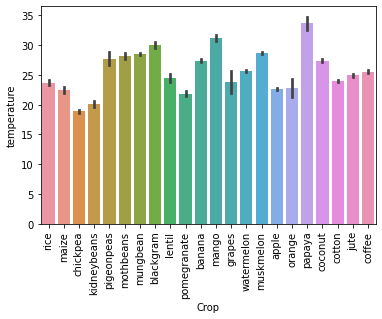

In [35]:
sns.barplot(crop_data["Crop"], crop_data["temperature"])
plt.xticks(rotation = 90)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

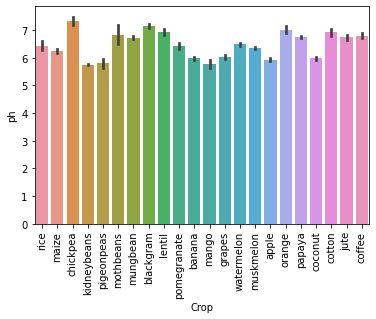

In [36]:
sns.barplot(crop_data["Crop"], crop_data["ph"])
plt.xticks(rotation = 90)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

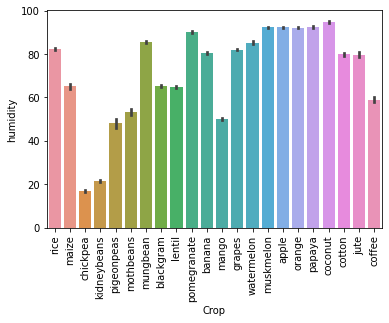

In [37]:
sns.barplot(crop_data["Crop"], crop_data["humidity"])
plt.xticks(rotation = 90)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

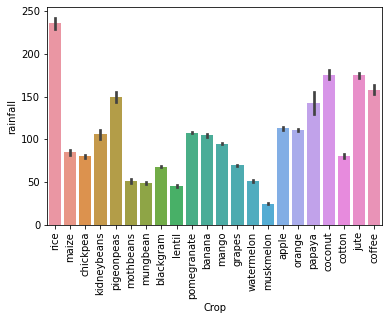

In [38]:
sns.barplot(crop_data["Crop"], crop_data["rainfall"])
plt.xticks(rotation = 90)

In [39]:
crop_data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

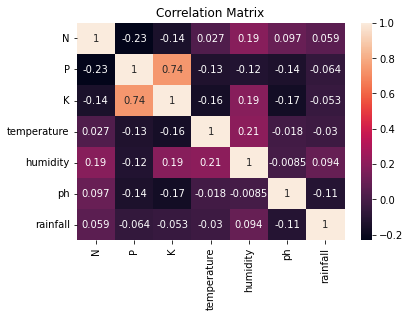

In [40]:
sns.heatmap(crop_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [41]:
# shuffling the dataset to remove order
from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop
1270,6,140,205,17.665584,82.929034,6.313086,69.867126,grapes
1481,98,22,47,29.072653,91.915332,6.341401,28.835684,muskmelon
1832,38,14,30,26.924495,91.201060,5.570745,194.902214,coconut
293,35,63,76,17.815645,17.607566,7.714153,90.820976,chickpea
1307,85,22,53,25.965342,89.770767,6.849472,59.463386,watermelon


In [42]:
# Selection of Feature and Target variables.
x = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['Crop']

In [43]:
# Encoding target variable 
y = pd.get_dummies(target)
y

,apple,banana,blackgram,chickpea,coconut,coffee,cotton,grapes,jute,kidneybeans,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
1270,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1481,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1832,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
293,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1032,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
# Splitting data set - 25% test dataset and 75% 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650, 22)
y_test : (550, 22)




### Decision Tree Classification

In [3]:
# Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

clf = DecisionTreeClassifier(random_state=6)
multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)

NameError: name 'x_train' is not defined

In [2]:
# Predicting test results 
decision_pred = multi_target_decision.predict(x_test)
decision_pred

x_test1 = np.transpose(pd.DataFrame([90,42,43,20.87974371,82.00274423,6.502985292,202.9355362]))
pred = decision_pred.predict(x_test1)
pred

NameError: name 'x_test' is not defined

In [ ]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a2 = accuracy_score(y_test.values.argmax(axis=1), decision_pred.argmax(axis=1))
a2

0.9672727272727273

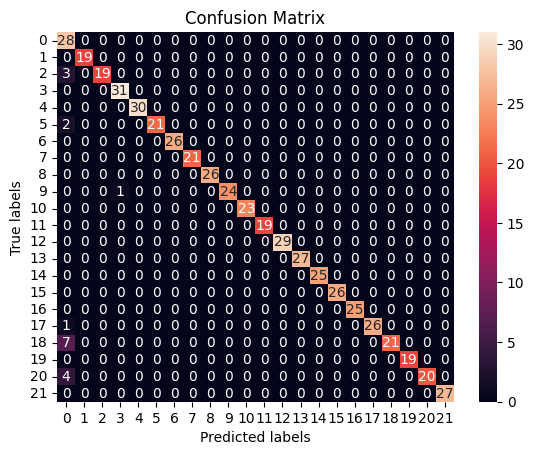

In [ ]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values.argmax(axis=1), decision_pred.argmax(axis=1))
#cm = confusion_matrix(y_test, gnb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test.values.argmax(axis=1), decision_pred.argmax(axis=1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test.values.argmax(axis=1), decision_pred.argmax(axis=1), digits=3))

[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 27  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

### Random Forest Classification

In [ ]:
# Training
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [ ]:
# Predicting test results 
forest_pred = multi_target_forest.predict(x_test)
forest_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a3 = accuracy_score(y_test.values.argmax(axis=1), forest_pred.argmax(axis=1))
a3

0.98

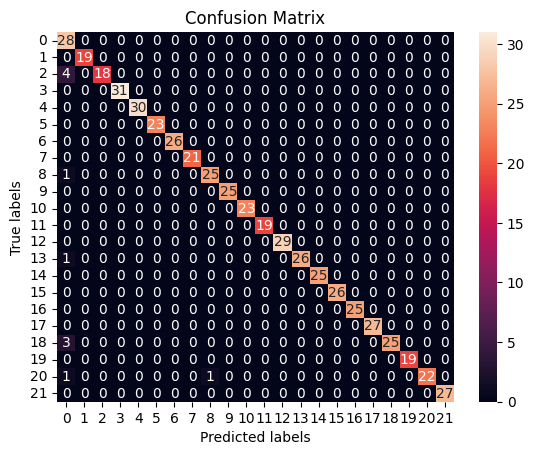

In [ ]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values.argmax(axis=1), forest_pred.argmax(axis=1))
#cm = confusion_matrix(y_test, gnb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test.values.argmax(axis=1), forest_pred.argmax(axis=1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test.values.argmax(axis=1), forest_pred.argmax(axis=1), digits=3))

[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
model = MultiOutputClassifier(knn_clf, n_jobs=-1)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(), n_jobs=-1)

In [ ]:
knn_pred = model.predict(x_test)
knn_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
a4 = accuracy_score(y_test.values.argmax(axis=1), knn_pred.argmax(axis=1))
a4

0.9745454545454545

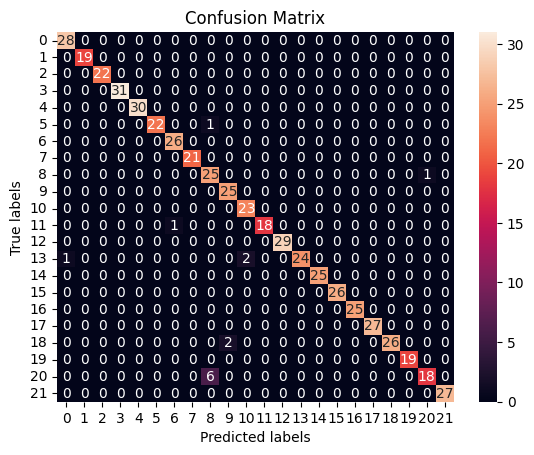

In [ ]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values.argmax(axis=1), knn_pred.argmax(axis=1))
#cm = confusion_matrix(y_test, gnb_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
from sklearn import metrics
# Print the confusion matrix
print(metrics.confusion_matrix(y_test.values.argmax(axis=1), knn_pred.argmax(axis=1)))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test.values.argmax(axis=1), knn_pred.argmax(axis=1), digits=3))

[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 22  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  2  0  0 24  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0